In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

In [2]:
images_path='Images/'
images=glob(images_path+'*.jpg')
len(images)

8091

In [3]:
images[:5]

['Images\\1000268201_693b08cb0e.jpg',
 'Images\\1001773457_577c3a7d70.jpg',
 'Images\\1002674143_1b742ab4b8.jpg',
 'Images\\1003163366_44323f5815.jpg',
 'Images\\1007129816_e794419615.jpg']

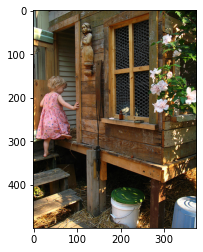

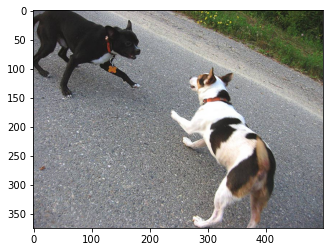

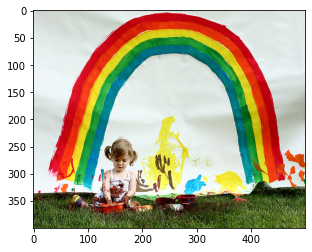

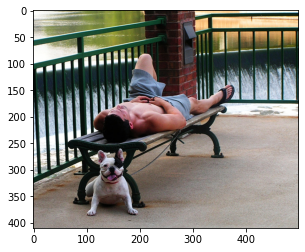

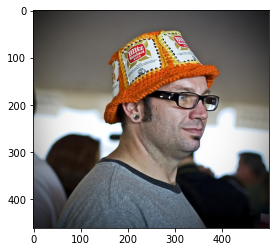

In [4]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure()
    img=cv2.imread(images[i])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [5]:
from keras.applications import ResNet50

incept_model=ResNet50(include_top=True)

In [6]:
# We will remove the last-prediction layer

from keras.models import Model
last=incept_model.layers[-2].output
new_model=Model(inputs=incept_model.input,outputs=last)


In [7]:
#we will preprocess now since the images are not in same size

images_feature={}
count=0
for i in images:
    img=cv2.imread(i)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))  # reshape all the images into 224,224
    
    img=img.reshape(1,224,224,3) # reshaping it into 3 Dim
    
    img_name=i[7:]  # Getting the exact name of the image
    pred=new_model.predict(img).reshape(2048,)
    images_feature[img_name]=pred
    count+=1
    
    if count>1499:
        break
    elif count%50==0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [25]:
# Text Preprocess
caption_path='Flickr_TextData/Flickr8k.token.txt'

In [26]:
captions=open(caption_path,'rb').read().decode('utf-8').split('\n')

In [27]:
captions[0:10]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

In [28]:
# we create a dic with id as key and 5 sentences as values

captions_dict={}
for i in captions:
    try:
        img_name=i.split('\t')[0][:-2] # getting the id
        caption=i.split('\t')[1]   # getting the captions

        if img_name in images_feature: # Mapping
            if img_name not in captions_dict: #if not there, create a new key
                captions_dict[img_name]=[caption]
            else:
                captions_dict[img_name].append(caption)  # if the key is there, append the value
    except:
        pass

In [29]:
def preprocessed(txt):
    modified=txt.lower()
    modified='startofseq ' + modified +' endofseq'
    return modified

In [30]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)]=preprocessed(vv)

In [31]:
# creating a vocab

count_words={}
count=1
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word]=count
                count+=1

In [32]:
#unique words
len(count_words)

3988

In [36]:
# converting string to integers
for k, vv in captions_dict.items():
    for v in vv:
        encoded=[]
        for word in v.split():
            encoded.append(count_words[word])
        captions_dict[k][vv.index(v)]=encoded

In [38]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [39]:
max_len=0
for k,vv in captions_dict.items():
    for v in vv:
        if len(v)>max_len:
            max_len=len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 29, 30, 31, 2, 42, 30, 37, 43, 44, 33, 45, 46, 38, 39, 4, 25, 47, 16, 17]
[1, 2, 23, 18, 56, 4, 57, 58, 4, 59, 11, 2, 60, 61, 37, 27, 62, 4, 2, 63, 16, 17]
[1, 2, 66, 18, 4, 25, 67, 68, 37, 69, 4, 59, 11, 2, 42, 70, 37, 2, 61, 40, 71, 16, 17]
[1, 2, 250, 31, 13, 251, 136, 252, 253, 82, 25, 254, 136, 64, 88, 26, 2, 255, 37, 2, 131, 82, 256, 16, 17]
[1, 2, 77, 7, 93, 25, 247, 11, 2, 237, 9, 26, 81, 226, 4, 59, 11, 400, 340, 80, 188, 77, 192, 40, 16, 17]
[1, 2, 77, 4, 144, 565, 2, 23, 149, 9, 4, 25, 230, 31, 589, 195, 83, 26, 590, 389, 591, 298, 106, 219, 83, 16, 17]
[1, 25, 18, 4, 25, 656, 586, 657, 7, 145, 88, 26, 48, 75, 200, 658, 147, 7, 103, 2, 29, 659, 31, 25, 39, 7, 660, 661, 16, 17]
[1, 72, 33, 349, 75, 200, 136, 147, 561, 904, 93, 2, 905, 906, 136, 147, 37, 134, 907, 884, 31, 849, 4, 27, 226, 136, 31, 147, 37, 908, 473, 16, 17]
[1, 2, 18, 4, 2, 112, 31, 29, 1485, 37, 42, 1265, 7, 145, 88, 26, 2, 77, 4, 2,

In [40]:
max_len

37

In [44]:
vocab_size=len(count_words)

def generator(photo,caption):
    X=[]
    y_in=[]
    y_out=[]
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1,len(v)):
                X.append(photo[k])
                
                in_seq=[v[:i]]
                out_seq=v[i]
                
                in_seq=pad_sequences(in_seq,maxlen=max_len,padding='post',truncating='post')[0]
                out_seq=to_categorical([out_seq],num_classes=vocab_size+1)[0]
                
                y_in.append(in_seq)
                y_out.append(out_seq)
    return X, y_in,y_out
    

In [45]:
X,y_in,y_out=generator(images_feature,captions_dict)

In [46]:
len(X), len(y_in),len(y_out)

(96750, 96750, 96750)

In [47]:
X=np.array(X)
y_in=np.array(y_in,dtype='float64')

In [48]:
y_out=np.array(y_out,dtype='float64')


In [49]:
X.shape , y_in.shape, y_out.shape

((96750, 2048), (96750, 37), (96750, 3989))

In [51]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [86]:
embedding_size = 128
max_len = max_len
vocab_size = len(count_words)+1

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 37, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 37, 128)           510592    
_________________________________________________________________
lstm_9 (LSTM)                (None, 37, 256)           394240    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 37, 128)           32896     
Total params: 937,728
Trai

In [87]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)


Epoch 1/50
189/189 [==============================] - 37s 169ms/step - loss: 5.4314 - accuracy: 0.1254
Epoch 2/50
189/189 [==============================] - 32s 172ms/step - loss: 4.6715 - accuracy: 0.2115
Epoch 3/50
189/189 [==============================] - 33s 173ms/step - loss: 4.3719 - accuracy: 0.2455
Epoch 4/50
189/189 [==============================] - 33s 175ms/step - loss: 4.1707 - accuracy: 0.2662
Epoch 5/50
189/189 [==============================] - 33s 174ms/step - loss: 4.0648 - accuracy: 0.2795
Epoch 6/50
189/189 [==============================] - 33s 173ms/step - loss: 3.9298 - accuracy: 0.2957
Epoch 7/50
189/189 [==============================] - 33s 173ms/step - loss: 3.7896 - accuracy: 0.3073
Epoch 8/50
189/189 [==============================] - 33s 173ms/step - loss: 3.5734 - accuracy: 0.3315
Epoch 9/50
189/189 [==============================] - 33s 174ms/step - loss: 3.4070 - accuracy: 0.3492
Epoch 10/50
189/189 [==============================] - 33s 174ms/step - l

In [88]:
inv_dict = {v:k for k, v in count_words.items()}

In [89]:
model.save('model.h5')
model.save_weights('mine_model_weights.h5')
np.save('vocab.npy', count_words)

In [90]:
def getImage(x):
    
    test_img_path = images[x]
    print(test_img_path)
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [91]:
getImage(2500).shape

Images\2635938723_11b85e6763.jpg


(1, 224, 224, 3)

In [92]:
test_feature = new_model.predict(getImage(2500)).reshape(1,2048)

Images\2635938723_11b85e6763.jpg


Images\3373544964_c9f1253b7d.jpg
Images\3139876823_859c7d7c23.jpg
Images\3016708786_3591106cca.jpg
Images\3146630574_05d9ebbed1.jpg
Images\3259991972_fce3ab18b2.jpg


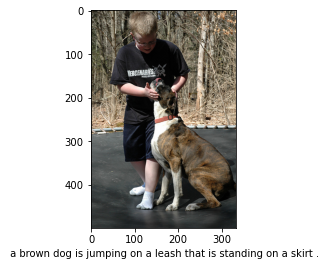

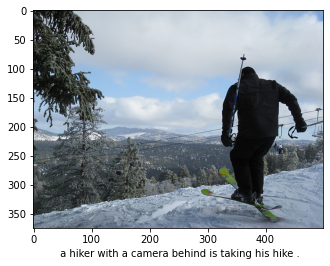

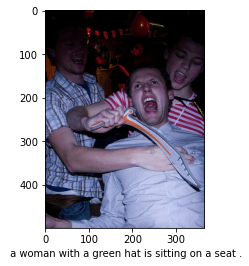

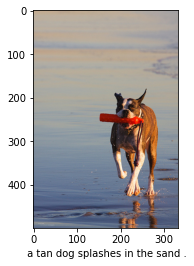

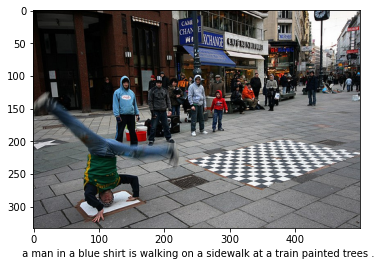

In [101]:
np.random.seed(15)
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = new_model.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(count_words[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=max_len)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption.rsplit(' ', 1)[0])

In [94]:
text_inp

['startofseq', 'a', 'dog', 'walking', 'in', 'the', 'water', '.']

In [98]:
caption.rsplit(' ', 1)[0]

' a dog walking in the water .'